In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("glassdoor_clean_data_eda.csv")

In [3]:
df.head(5)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_Studio,sparx,spark,aws,excel,job_simpl,seniority,desc_len
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,49,1,0,0,0,0,1,data scientist,na,2536
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,38,1,0,0,0,0,0,data scientist,na,4783
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,12,1,0,0,1,0,1,data scientist,na,3461
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,57,1,0,0,0,0,0,data scientist,na,3883
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,24,1,0,0,0,0,1,data scientist,na,2728


In [4]:
#Choose the relevant columns
#model to be used on the above dataset
#Multiple linear regression
#Lasso regression
#random forest
#Train models - GridsearchCV

In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'state', 'same_state', 'age', 'python_yn', 'R_Studio',
       'sparx', 'spark', 'aws', 'excel', 'job_simpl', 'seniority', 'desc_len'],
      dtype='object')

In [6]:
df.drop('sparx', axis=1, inplace=True)

In [7]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_text', 'state', 'same_state', 'age', 'python_yn', 'R_Studio',
       'spark', 'aws', 'excel', 'job_simpl', 'seniority', 'desc_len'],
      dtype='object')

In [8]:
df_model = df[['avg_salary','Rating','Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors','employer_provided','state', 'same_state','age', 'python_yn', 'R_Studio','seniority', 'desc_len', 'spark', 'aws', 'excel', 'job_simpl']]

In [9]:
df_dum = pd.get_dummies(df_model)

In [10]:
df_dum.head(5)

,avg_salary,Rating,Competitors,employer_provided,same_state,age,python_yn,R_Studio,desc_len,spark,...,seniority_jr,seniority_na,seniority_senior,job_simpl_analyst,job_simpl_data engineer,job_simpl_data scientist,job_simpl_director,job_simpl_manager,job_simpl_mle,job_simpl_na
0,72.0,3.8,0,0,0,49,1,0,2536,0,...,0,1,0,0,0,1,0,0,0,0
1,87.5,3.4,0,0,0,38,1,0,4783,0,...,0,1,0,0,0,1,0,0,0,0
2,85.0,4.8,0,0,1,12,1,0,3461,1,...,0,1,0,0,0,1,0,0,0,0
3,76.5,3.8,3,0,1,57,1,0,3883,0,...,0,1,0,0,0,1,0,0,0,0
4,114.5,2.9,3,0,1,24,1,0,2728,0,...,0,1,0,0,0,1,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X=df_dum.drop('avg_salary', axis = 1)

In [13]:
df_dum.avg_salary.head(5)

0     72.0
1     87.5
2     85.0
3     76.5
4    114.5
Name: avg_salary, dtype: float64

In [14]:
y = df_dum.avg_salary.values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

In [16]:
#Multiple linear Regression
import statsmodels.api as sm

In [17]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     9.860
Date:                Sun, 25 Dec 2022   Prob (F-statistic):           1.18e-91
Time:                        09:18:28   Log-Likelihood:                -3320.8
No. Observations:                 742   AIC:                             6928.
Df Residuals:                     599   BIC:                             7587.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                42.1371      6.805      6.192      0.000      28.772      55.502
Rating                                                3.2406      1.959      1.654      0.099      -0.607       7.089
Competitors                                           2.4926      0.878      2.840      0.005       0.769       4.217
employer_provided                                    32.0779     11.666      2.750      0.006       9.166      54.990
same_state                                            3.6965      2.647      1.397      0.163      -1.501       8.894
age                                                   0.0432      0.030      1.424      0.155      -0.016       0.103
python_yn                                             7.9299      2.557      3.101      0.002       2.908      12.952
R_Studio                                             21.5929     23.124      0.934      0.351     -23.820      67.006
desc_len                                           4.799e-05      0.001      0.062      0.950      -0.001       0.002
spark                                                 0.3811      2.955      0.129      0.897      -5.423       6.185
aws                                                   0.1988      2.762      0.072      0.943      -5.226       5.623
excel                                                -0.2810      2.296     -0.122      0.903      -4.790       4.228
Size_-1                                              14.2846      8.735      1.635      0.103      -2.871      31.440
Size_1 to 50 employees                                2.1689      6.576      0.330      0.742     -10.746      15.084
Size_10000+ employees                                -2.0985      5.869     -0.358      0.721     -13.625       9.428
Size_1001 to 5000 employees                           4.6450      3.911      1.188      0.235      -3.036      12.326
Size_201 to 500 employees                             2.3749      3.923      0.605      0.545      -5.330      10.080
Size_5001 to 10000 employees                         -5.3718      5.496     -0.977      0.329     -16.166       5.423
Size_501 to 1000 employees                            2.3446      4.110      0.570      0.569      -5.727      10.416
Size_51 to 200 employees                              2.9135      4.469      0.652      0.515      -5.864      11.691
Size_Unknown                                         20.8758     14.167      1.474      0.141      -6.947      48.699
Type of ownership_-1                                 14.2846      8.735      1.635      0.103      -2.871      31.440
Type of ownership_College / University               11.5402     17.909      0.644      0.520     -23.632      46.712
Type of ownersh

In [18]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train,y_train)

LinearRegression()

In [21]:
cross_val_score(lm,X_train,y_train, scoring = "neg_mean_absolute_error", cv =3)

array([ -123387.47919684, -1348685.42362299, -1347423.31735493])

In [22]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = "neg_mean_absolute_error", cv =3))

-939832.0733915869

In [23]:
lm_l = Lasso()
lm_l.fit(X_train,y_train)

Lasso()

In [24]:
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = "neg_mean_absolute_error", cv =3))

-21.77277209151188

In [25]:
alpha = []
error = []

In [26]:
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha = (i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = "neg_mean_absolute_error", cv =2)))

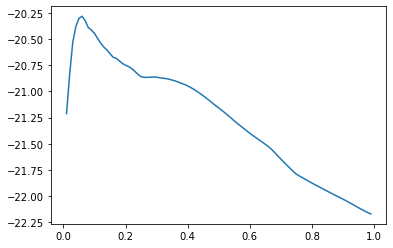

In [27]:
plt.plot(alpha,error)

In [28]:
err = tuple(zip(alpha,error))

In [29]:
df_err = pd.DataFrame(err, columns = ['alpha','error'])

In [30]:
df_err.head(5)

,alpha,error
0,0.01,-21.212336
1,0.02,-20.838581
2,0.03,-20.530979
3,0.04,-20.379669
4,0.05,-20.301725


In [31]:
df_err[df_err.error == max(df_err.error)]

,alpha,error
5,0.06,-20.281757


In [32]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [33]:
np.mean(cross_val_score(rf,X_train,y_train, scoring = "neg_mean_absolute_error", cv =3))

-14.229645738262489

In [34]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion': ('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [35]:
gs = GridSearchCV(rf, parameters, scoring = 'neg_mean_absolute_error', cv= 3)

In [36]:
gs.fit(X_train,y_train)

C:\Users\Rose\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Rose\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Rose\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Rose\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\Rose\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [37]:
gs.best_score_

-14.016968116016338

In [39]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=140)

In [41]:
tpred_lm = lm.predict(X_test)
tpred_lm_l = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, tpred_lm)

362144910.7781807

In [45]:
mean_absolute_error(y_test, tpred_lm_l)

22.178086263586565

In [46]:
mean_absolute_error(y_test, tpred_rf)

12.973777564717162

In [48]:
import pickle

In [50]:
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open('model_file' + ".p" , "wb"))

In [52]:
file_name = 'model_file.p'
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']  

In [53]:
model.predict(X_test.iloc[1,:].values.reshape(1,-1))

C:\Users\Rose\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([109.31785714])